In [18]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# tensorflow 2.0
from tensorflow.keras.models import load_model  
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense       
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers 

# sklearn => useful for pre-process
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

print(tf.__version__)

2.0.0


In [5]:
data = np.loadtxt('./wine.csv', delimiter=",", dtype=np.float64)
print(type(data))
print(data.shape)

X = data[:, 0:12]
Y = data[:, 12]

print(X.shape)
print(Y.shape)

<class 'numpy.ndarray'>
(6497, 13)
(6497, 12)
(6497,)


In [6]:
seed = 0

# split data => test 90%, validation 10%
x_train_all, x_test, y_train_all, y_test = train_test_split(X, Y,
                                                            stratify=Y,
                                                            test_size=0.1,
                                                            random_state=seed)
# split test data(85%) => test 90%, validation 10%
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                                  stratify=y_train_all,
                                                  test_size=0.1,
                                                  random_state=seed)
print(y_val)
print(y_val.shape) 

[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [19]:
model = Sequential()

model.add(Dense(60, input_shape=(12, ), activation='relu',
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(30, activation='relu',
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001))) 
model.add(Dense(10, activation='relu',
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001))) 
model.add(Dense(1, activation='sigmoid')) 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR): 
    # create directory when does not exist
    os.mkdir(MODEL_DIR)
    
modelpath='./model/{epoch:04d}-{val_accuracy:.4f}.h5'    

# Save model when accuracy increased
checkpointer = ModelCheckpoint(filepath=modelpath,
                              monitor='val_accuracy',
                              verbose=1, save_best_only=True)

early_stopping = EarlyStopping(monitor='loss', patience=5)
hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=1000, 
                 batch_size=5, callbacks=[early_stopping])

Train on 5262 samples, validate on 585 samples
Epoch 1/1000
5262/5262 [==============================] - 2s 434us/sample - loss: 0.4725 - accuracy: 0.9208 - val_loss: 0.3547 - val_accuracy: 0.9385
Epoch 2/1000
5262/5262 [==============================] - 2s 302us/sample - loss: 0.3600 - accuracy: 0.9337 - val_loss: 0.3117 - val_accuracy: 0.9282
Epoch 3/1000
5262/5262 [==============================] - 2s 301us/sample - loss: 0.3166 - accuracy: 0.9379 - val_loss: 0.3665 - val_accuracy: 0.9128
Epoch 4/1000
5262/5262 [==============================] - 2s 296us/sample - loss: 0.2897 - accuracy: 0.9399 - val_loss: 0.2652 - val_accuracy: 0.9538
Epoch 5/1000
5262/5262 [==============================] - 2s 298us/sample - loss: 0.2718 - accuracy: 0.9411 - val_loss: 0.2333 - val_accuracy: 0.9521
Epoch 6/1000
5262/5262 [==============================] - 2s 300us/sample - loss: 0.2512 - accuracy: 0.9443 - val_loss: 0.2194 - val_accuracy: 0.9470
Epoch 7/1000
5262/5262 [=============================

5262/5262 [==============================] - 2s 314us/sample - loss: 0.0960 - accuracy: 0.9791 - val_loss: 0.0849 - val_accuracy: 0.9795
Epoch 56/1000
5262/5262 [==============================] - 2s 290us/sample - loss: 0.0987 - accuracy: 0.9753 - val_loss: 0.0861 - val_accuracy: 0.9863
Epoch 57/1000
5262/5262 [==============================] - 2s 288us/sample - loss: 0.0941 - accuracy: 0.9770 - val_loss: 0.0915 - val_accuracy: 0.9795
Epoch 58/1000
5262/5262 [==============================] - 2s 304us/sample - loss: 0.0964 - accuracy: 0.9772 - val_loss: 0.0833 - val_accuracy: 0.9812
Epoch 59/1000
5262/5262 [==============================] - 2s 314us/sample - loss: 0.0952 - accuracy: 0.9785 - val_loss: 0.0807 - val_accuracy: 0.9829
Epoch 60/1000
5262/5262 [==============================] - 2s 304us/sample - loss: 0.0963 - accuracy: 0.9781 - val_loss: 0.1193 - val_accuracy: 0.9658
Epoch 61/1000
5262/5262 [==============================] - 2s 301us/sample - loss: 0.0934 - accuracy: 0.9797

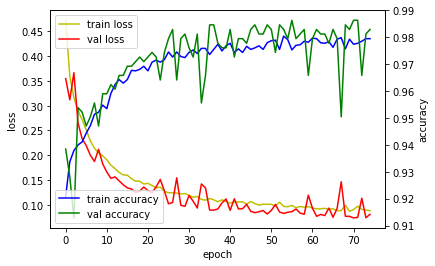

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 60)                780       
_________________________________________________________________
dense_17 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 2,931
Trainable params: 2,931
Non-trainable params: 0
_________________________________________________________________


In [20]:
fig, loss_ax = plt.subplots()

# double y-axis
acc_ax = loss_ax.twinx() 

# y-axis (left)
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

# y-axis (right)
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
#acc_ax.set_ylim([0.0, 1.0])

# axis labels
loss_ax.set_xlabel('epoch')  
loss_ax.set_ylabel('loss')   
acc_ax.set_ylabel('accuracy') 

loss_ax.legend(loc='upper left') 
acc_ax.legend(loc='lower left')  

plt.show()
model.summary()

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
print('Loss=', test_loss, '/Accuracy=', (test_acc*100), '%')

Loss= 0.06473997183430653 /Accuracy= 99.07692074775696 %


In [22]:
pd = model.predict(x_test[0:10])

for i in range(len(x_test[0:10])):
    fmt = 'Actual= {0}, Predicted: {1}'
    print(fmt.format(y_test[i], pd[i]), end='')
    
    if (pd[i] >= 0.5):
        print('=> Red ')
    else:
        print('=> White ')

Actual= 0.0, Predicted: [0.00368327]=> White 
Actual= 0.0, Predicted: [0.0037846]=> White 
Actual= 0.0, Predicted: [0.00468975]=> White 
Actual= 0.0, Predicted: [0.00401446]=> White 
Actual= 1.0, Predicted: [0.05428514]=> White 
Actual= 0.0, Predicted: [0.00975242]=> White 
Actual= 0.0, Predicted: [0.00534502]=> White 
Actual= 0.0, Predicted: [0.00348833]=> White 
Actual= 0.0, Predicted: [0.654464]=> Red 
Actual= 0.0, Predicted: [0.00357056]=> White 
